# Bayesian Dice
A fun little experiment with a simulation of dice throws.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
num_dices = [2,3,4,5,6,7,8]

throws = []
for nd in num_dices:
    throws.append(np.random.choice([1,2,3,4,5,6], (10000, nd)))

eye_sums = []
for throw in throws:
    eye_sums.append(np.sum(throw, axis=1).reshape(1, -1))

df = np.concatenate(eye_sums, axis=0)

Text(0.5, 113.99999999999989, 'Sum of Eyes')

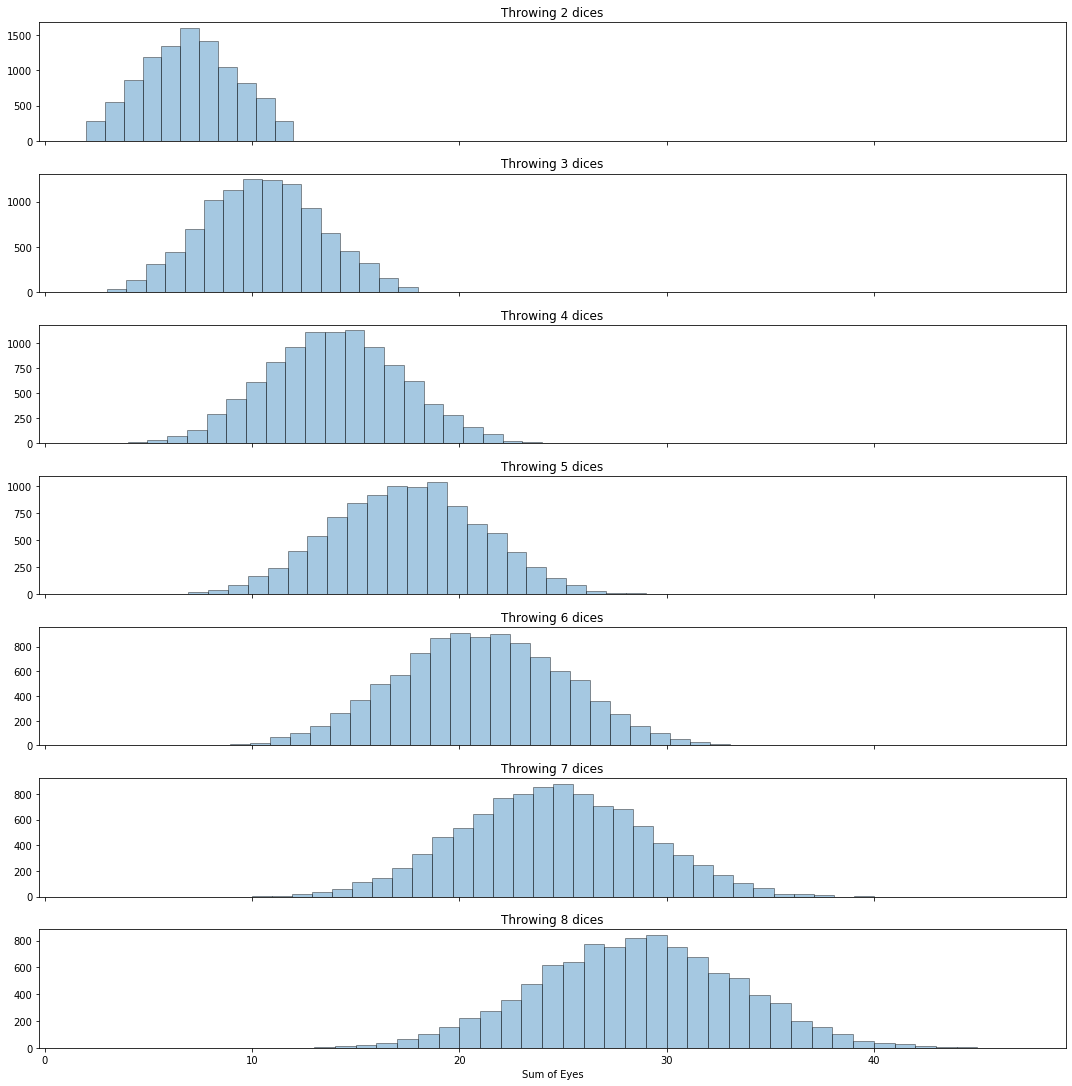

In [4]:
fig, axes = plt.subplots(nrows=len(num_dices), sharex=True, figsize=(15,15))
for i, group in enumerate(df):
    sns.distplot(group, ax=axes[i], kde=False, bins=len(np.unique(group)), hist_kws=dict(ec='k', fill='#00305e'))
    axes[i].set_title(f"Throwing {i+min(num_dices)} dices")
plt.tight_layout()
plt.xlabel("Sum of Eyes")

Let $Y =$ Sum of eyes and $X =$ number of dice thrown, then  

$P(X | Y) = \frac{P(Y | X) \cdot P(X)}{P(Y)}$, so for example  

$P(X = 7 | Y = 24) = \frac{P(Y = 24 | X = 7) \cdot P(X=7)}{P(Y=24)}$

In [5]:
def px_given_y(x, y):
    x -= min(num_dices)
    pyx = len(df[x, df[x]==y])/len(df[x])
    px = 1/len(num_dices)
    py = len(df[df==y])/len(df.flat)
    return (pyx * px)/py

In [6]:
px_given_y(x=7, y=24)

0.3504901960784314

In [7]:
y = 14
for x in range(2,8):
    print(f"P(X={x} | Y={y}) = {px_given_y(x, y)}")

P(X=2 | Y=14) = 0.0
P(X=3 | Y=14) = 0.23221906116642954
P(X=4 | Y=14) = 0.3940256045519203
P(X=5 | Y=14) = 0.2560455192034139
P(X=6 | Y=14) = 0.09210526315789473
P(X=7 | Y=14) = 0.021337126600284494
